In [1]:
import numpy as np

# 导入time库，主要用于计算训练和测试时间
import time

# 导入math库，主要使用其一些函数，比如取整函数、指数函数
import math

# 导入scipy.io库，主要用于读取matlab的mat文件
import scipy.io as scio

# 导入matplotlib.pyplot函数，用于绘制图片
import matplotlib.pyplot as plt

# 导入Image函数，用于旋转图片
from PIL import Image

# 导入clone函数，用于创建某个模型的深拷贝
from sklearn.base import clone

# 导入train_test_split函数，用于分割训练集和测试集
from sklearn.model_selection import train_test_split

# 导入concatenate_sequences函数，用于将图片和分类转为特定的ndarray数组
from pyrcn.util import concatenate_sequences

# 导入pyrcn的增量回归器
from pyrcn.linear_model import IncrementalRegression

# 导入LabelBinarizer类，对y快速进行one-hot编码
from sklearn.preprocessing import LabelBinarizer

# 导入MatrixToValueProjection类，用于将矩阵投影到值
from pyrcn.projection import MatrixToValueProjection

# 导入sklearn库的load_digits函数，用于加载手写数字数据集
from sklearn.datasets import load_digits as sklearn_load_digits

# 导入accuracy_score函数，用于计算分类准确度
from pyrcn.metrics import accuracy_score

[[0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0.]]


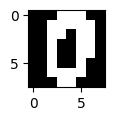

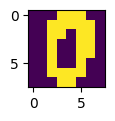

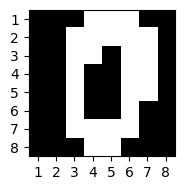

Label:0


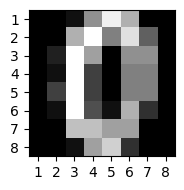

Label:0
Number of digits: 1797
Shape of digits (8, 8)


In [2]:
##  加载手写数字数据集  ##
# return_X_y设置为True，函数返回一个包含数据矩阵和目标向量的元组 (data, target)
# as_sequence是布尔值，默认为False，如果设置为True，则返回数据矩阵和目标向量的序列
# as_sequence设置后，对应的是一维narray数组，每个数据点的图像以8x8矩阵的形式表示，
# as_sequence设置后，访问时元素只能使用一维索引访问，再对该元素根据矩阵索引访问，不能直接二维索引访问
# 另外有as_frame，是一个布尔值，默认为False，如果设置为True，则返回数据和目标作为pandas DataFrame或Series。

# 二值化图像
X_ori, y_ori = sklearn_load_digits(n_class=10, return_X_y=True, as_frame=False)
for i in range(len(X_ori)):
    X_ori[i] = np.where(X_ori[i] <= 5, 0, 1)
X = np.empty(shape=(X_ori.shape[0],), dtype=object)
y = np.empty(shape=(X_ori.shape[0],), dtype=object)
for k, (X_single, y_single) in enumerate(zip(X_ori, y_ori)):
    X[k] = X_single.reshape(8, 8).T
    y[k] = np.atleast_1d(y_single)

# 未二值化的灰度图像
X_ori2, y_ori2 = sklearn_load_digits(n_class=10, return_X_y=True, as_frame=False)
X2 = np.empty(shape=(X_ori2.shape[0],), dtype=object)
y2 = np.empty(shape=(X_ori2.shape[0],), dtype=object)
for k, (X_single, y_single) in enumerate(zip(X_ori2, y_ori2)):
    X2[k] = X_single.reshape(8, 8).T
    y2[k] = np.atleast_1d(y_single)   
    

# 查看结果
start_index = 10
end_index = 11
step = 1
for test_id in range(start_index,end_index,step):
    
    # print(y[test_id])
    # print(X2.loc[0,['pixel_0_4']])
    # print(y2[0:100])
    # 原始图片需要顺时针旋转90度再水平翻转才是正确结果
    img_show = np.flip(np.rot90(X[test_id],k=-1),1)
    print(img_show)
    # 展示图片，不要太大
    plt.figure(figsize=(1,1))
    # 输出其对应的灰度图
    plt.imshow(img_show,cmap='gray')
    plt.show()
    # 输出其对应的颜色图
    plt.figure(figsize=(1,1))
    plt.imshow(img_show)
    plt.show()
    
    # print(y2[test_id])
    # 原始图片需要顺时针旋转90度再水平翻转才是正确结果
    # img_show = np.flip(np.rot90(X2[test_id],k=-1),1)
    # print(img_show)
    # # 展示图片，不要太大
    # plt.figure(figsize=(1,1))
    # # 输出其对应的灰度图
    # plt.imshow(img_show,cmap='gray')
    # plt.show()
    # 输出其对应的颜色图
    # plt.figure(figsize=(1,1))
    # plt.imshow(img_show)
    # plt.show()
    
    img_show=np.flip(np.rot90(X[test_id],k=-1),1)
    fig, ax = plt.subplots(figsize=(2,2))
    ax.imshow(img_show, interpolation='nearest',cmap='gray')
    plt.xticks(np.arange(0,8,1),['1','2','3','4','5','6','7','8'])
    plt.yticks(np.arange(0,8,1),['1','2','3','4','5','6','7','8'])
    plt.tight_layout()
    # plt.savefig('0.png')
    plt.show()
    print("Label:",y[test_id][0],sep="")
    
    
    img_show=np.flip(np.rot90(X2[test_id],k=-1),1)
    fig, ax = plt.subplots(figsize=(2,2))
    ax.imshow(img_show, interpolation='nearest',cmap='gray')
    plt.xticks(np.arange(0,8,1),['1','2','3','4','5','6','7','8'])
    plt.yticks(np.arange(0,8,1),['1','2','3','4','5','6','7','8'])
    plt.tight_layout()
    # plt.savefig('0init.png')
    plt.show()
    print("Label:",y[test_id][0],sep="")
    
# 输出数据集图片数量和图片大小
print("Number of digits: {0}".format(len(X)))
print("Shape of digits {0}".format(X[test_id].shape))

In [3]:
# 将y中所有的单个值数组元素转为单个值，去掉元素内的数组包装
# 即对y进行如下转化：一维数组元素为一维数组->一维数组元素为值
stratify = np.asarray([np.unique(yt) for yt in y]).flatten()

# 将数据集乱序，分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=stratify, random_state=42)

# 对训练集和测试集的数据进行深拷贝
X_tr = np.copy(X_train)
y_tr = np.copy(y_train)
X_te = np.copy(X_test)
y_te = np.copy(y_test)

# 遍历目标向量，每个元素从单个值扩展为1*8的数组元素
# 用于将值转化为一个序列，使得该问题转变为序列到序列的问题
for k, _ in enumerate(y_tr):
    y_tr[k] = np.repeat(y_tr[k], 8, 0)
for k, _ in enumerate(y_te):
    y_te[k] = np.repeat(y_te[k], 8, 0)

stratify2 = np.asarray([np.unique(yt) for yt in y2]).flatten()
# 将数据集乱序，分割为训练集和测试集
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, stratify=stratify2, random_state=42)
# 对训练集和测试集的数据进行深拷贝
X_tr2 = np.copy(X_train2)
y_tr2 = np.copy(y_train2)
X_te2 = np.copy(X_test2)
y_te2 = np.copy(y_test2)
for k, _ in enumerate(y_tr2):
    y_tr2[k] = np.repeat(y_tr2[k], 8, 0)
for k, _ in enumerate(y_te2):
    y_te2[k] = np.repeat(y_te2[k], 8, 0)
    
    
# 输出一维ndarray值
print(stratify)
# 输出单个目标向量元素
print(y_tr[0])
# 输出训练集、测试集数据数量和图片大小
print("Number of digits in training set: {0}".format(len(X_train)))
print("Shape of digits in training set: {0}".format(X_train[0].shape))
print("Number of digits in test set: {0}".format(len(X_test)))
print("Shape of digits in test set: {0}".format(X_test[0].shape))

[0 1 2 ... 8 9 8]
[5 5 5 5 5 5 5 5]
Number of digits in training set: 1437
Shape of digits in training set: (8, 8)
Number of digits in test set: 360
Shape of digits in test set: (8, 8)


In [4]:
class image_to_signal:
    # 初始化函数
    def __init__(self,
                X_signal : np.array = None,
                Y_result : np.array = None,
                N_res : int = 50,
                K_in : int = -1,
                pulse_time : float = 1,
                time_frame : float = 3,
                interval_time : float = 2, 
                sparsity : float = -1):
        '''
        X_signal: 输入的图片，经过了二级化处理，可以根据像素确定是否有信号
        Y_result: 图片的分类结果，已进行了预处理后的图片，用于训练的拟合
        N_res: 隐藏层神经元数量，对应忆阻器的数量
        K_in: 稀疏性，对应的是每个忆阻器读取的每行图片元素数量
        pulse_time: 脉冲时间长度，对应的是单个信号的激活时间
        time_frame: 时间帧长度，对应的是单个信号的激活和衰减时间
        interval_time: 时间步间隔长度，对应的是每个
        sparsity: 稀疏性，对应的是每个忆阻器读取的每行图片元素数量比例
        '''
        # 根据mat文件设置激活信号的值计算和衰减值的计算
        self.up = scio.loadmat('./up.mat')["p"][0]
        self.down = scio.loadmat('./down.mat')["p2"][0]
        
        # 记录忆阻器数量
        self.N_res = N_res
        
        # 记录脉冲时间长度，时间帧长度和时间步的间隔长度
        self.pulse_time = pulse_time
        self.time_frame = time_frame
        self.interval_time = interval_time
        
        # 记录稀疏性和稀疏性比例
        self.K_in = K_in
        self.sparsity = sparsity
        
        # 对储备池状态信息进行拟合，使用回归器
        self.regressor = IncrementalRegression(alpha=1e-4)
        # 使用LabelBinarizer对分类进行one-hot编码
        self._encoder = LabelBinarizer()
        
        # 调用init_use函数，可以多次初始化输入图片和分类结果
        self.init_use(X_signal,Y_result)
        
        
    #初始化使用函数，参数同上
    def init_use(self,
                X_signal : np.array = None,
                Y_result : np.array = None):
        
        # 记录输入图片和对应分类
        self.input = X_signal
        self.res = Y_result
        
        # 根据输入的图片大小计算时间步数量、时间帧数量和输入图片的特征数(即每行像素数量)
        self.num_step = self.input[0].shape[0]
        self.num_frame = self.input[0].shape[1]
        self.N_features = self.input[0].shape[1]

        if self.K_in > 0:
            if self.K_in <=  self.N_features:
                self.num_frame = self.K_in
        elif self.sparsity > 0:
            self.num_frame = math.ceil(self.sparsity*self.num_frame)
        
        # 根据稀疏性随机选择每行部分像素形成脉冲
        self.random_sequence = np.zeros(shape = (self.N_res,self.num_step,self.num_frame), dtype=int)
        for i in range(self.N_res):
            for j in range(self.num_step):
                self.random_sequence[i][j] = np.sort(np.random.permutation(self.N_features)[0:self.num_frame])
        
        # 记录忆阻器对应的储备池状态信息
        self.hidden_layer_state = np.ndarray(shape = (self.input.shape[0]),dtype = object)
        for i in range(self.hidden_layer_state.shape[0]):
            self.hidden_layer_state[i] = np.zeros(shape = (self.num_step,self.N_res),dtype = float)
        self.state_index = 0
        
        # 完成上述处理后，将输入图片和对应分类进行序列连接，得到相应的连续ndarray数组，用于进一步处理
        self.input,self.res,self.sequence_ranges = concatenate_sequences(self.input,
                                                                         self.res,
                                                                         sequence_to_value = False)
        
    # 定义脉冲激活函数
    def caculate_pulse_up(self,value):
        x = self.pulse_time
        up_value = self.up[0]* x**5 + \
                self.up[1]* x**4 + \
                self.up[2]* x**3 + \
                self.up[3]* x**2 + \
                self.up[4]* x + self.up[5]
        return value + up_value
    
    # 定义衰减函数,在遇到激活信号时进行时间结算,或者计算隐藏层状态信号
    def caculate_signal_down(self,value,have_down_time):
        x = have_down_time
        down_ratio = self.down[0] * math.exp(-self.down[1]*x) + self.down[2] + \
                     self.down[3] * math.exp(-self.down[4]*x) + self.down[5] + \
                     self.down[6] * math.exp(-self.down[7]*x) + self.down[8]
        return value * down_ratio
    
    # 定义时间帧计算函数
    def caculate_time_frame(self,value,have_down_time,signal):
        if signal == 0:
            return value, have_down_time + self.time_frame
        else:
            value = self.caculate_signal_down(value,have_down_time)
            value = self.caculate_pulse_up(value)
            return value, self.time_frame - self.pulse_time
         
    # 定义时间步计算函数
    def caculate_time_step(self,value,have_down_time,image_row,random_sequence):
        for i in range(random_sequence.shape[0]):
            value,have_down_time = self.caculate_time_frame(value,
                                                       have_down_time,
                                                       image_row[random_sequence[i]])
        return value, have_down_time
    
    # 定义忆阻器读取状态计算函数，对应储备池的神经元状态信息
    # 每次读取一张图片进行记录
    def caculate_hidden_layer_state(self, X: np.ndarray = None, 
                                    hidden_layer_state: np.ndarray = None,
                                    state_index: int = 0):
        # # 清空储备池的信息
        # self.hidden_layer_state = np.zeros(shape = (self.num_step,self.N_res),dtype = float)
        
        # # i循环是图片
        # for i in range(int(self.input.shape[0]/self.num_step)):
        # j循环是忆阻器群
        for j in range(self.N_res):
            # value是输入新的时间步时忆阻器的当前信号值
            value = 0.0
            # have_down_time是从上次激活开始的总衰减时间
            have_down_time = 0.0

            # k循环是时间步
            for k in range(self.num_step):
                # 计算忆阻器读取图片特定行转换的信号后的信号值变化和已衰减时间变化
                # 如没有激活信号，则信号不变，改变已衰减时间，从而在需要时计算新的激活前信号值
                value,have_down_time = self.caculate_time_step(value,
                                                          have_down_time,
                                                          X[k],
                                                          # self.input[i*self.num_step+k],
                                                          self.random_sequence[j][k])
                # 根据变化后的情况计算隐藏层状态
                # self.hidden_layer_state[i][k][j] = self.caculate_signal_down(value,have_down_time)
                hidden_layer_state[state_index][k][j] = self.caculate_signal_down(value,have_down_time)
                # 根据时间步间隔时间修改已衰减时间
                have_down_time += self.interval_time
        return hidden_layer_state
        
    # 定义部分训练函数，用于计算序列的部分图片，保证逆矩阵的推迟计算
    def partial_fit(self, 
                    X: np.ndarray = None, 
                    y: np.ndarray = None, 
                    postpone_inverse: bool = False):
        # 计算输入图片对应的储备池信息
        self.caculate_hidden_layer_state(X,self.hidden_layer_state,self.state_index)
        # 对图片进行拟合
        self.regressor.partial_fit(self.hidden_layer_state[self.state_index],y,postpone_inverse)
        # 状态索引+1
        self.state_index += 1

        
    # 定义训练函数,可以输入新的数据，也可以使用已有数据
    # 注意使用新的数据会导致原有的数据被重置
    def fit(self,
            X_train : np.ndarray = None, 
            Y_train : np.ndarray = None):
        # 修改输入的input和res
        if X_train is not None and Y_train is not None:
            self.init_use(X_train,y_train)
        
        # 对结果进行二进制编码，使用标签编码器,完成编码
        self._encoder = LabelBinarizer().fit(self.res)
        self.res = self._encoder.transform(self.res)
        
        # 拟合最后一张图片之前的图片，并推迟计算逆矩阵
        [self.partial_fit(X = self.input[idx[0]:idx[1],...],
                          y = self.res[idx[0]:idx[1],...],
                          postpone_inverse=True)
        for idx in self.sequence_ranges[:-1]]
        
        # 拟合最后一张不推迟逆矩阵的计算
        self.partial_fit(X = self.input[self.sequence_ranges[-1][0]:, ...],
                         y = self.res[self.sequence_ranges[-1][0]:, ...],
                         postpone_inverse=False)
        
    # 定义预测函数
    def predict(self, X_test: np.ndarray = None):
        # 初始化临时的储备池，用于记录测试集的结果
        hidden_layer_state = np.ndarray(shape = (X_test.shape[0]),dtype = object)
        for i in range(hidden_layer_state.shape[0]):
            hidden_layer_state[i] = np.zeros(shape = (self.num_step,self.N_res),dtype = float)
        
        # 记录图片索引
        state_index = 0
        
        # 记录预测结果
        y = np.empty(shape=X_test.shape, dtype=object)
        
        # 进行储备池计算
        for i in range(len(X_test)):
            self.caculate_hidden_layer_state(X_test[i], hidden_layer_state,state_index)
            y[i] = self.regressor.predict(hidden_layer_state[i])
            # 二进制标签分类转为多分类标签
            y[i] = MatrixToValueProjection(
                    output_strategy= "winner_takes_all")\
                    .fit_transform(y[i])
            state_index += 1

        # 返回预测结果
        return y

In [5]:
example = image_to_signal(X_signal = X_tr, Y_result= y_tr, N_res = 8000, K_in = 2,
                          pulse_time = 1, time_frame = 4, interval_time = 2)
example.fit()
y_te_predict = example.predict(X_test = X_te)

acc_score:0.19444444444444445
测试集的第20张手写数字图片:


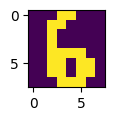

正确标签结果:[6]
预测结果:[6]

测试集的第21张手写数字图片:


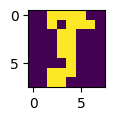

正确标签结果:[3]
预测结果:[3]

测试集的第22张手写数字图片:


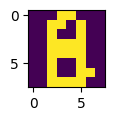

正确标签结果:[8]
预测结果:[8]

测试集的第23张手写数字图片:


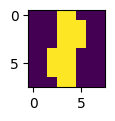

正确标签结果:[1]
预测结果:[1]

测试集的第24张手写数字图片:


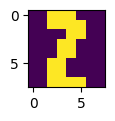

正确标签结果:[2]
预测结果:[2]

测试集的第25张手写数字图片:


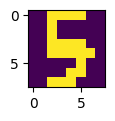

正确标签结果:[5]
预测结果:[8]

测试集的第26张手写数字图片:


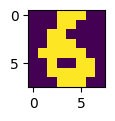

正确标签结果:[6]
预测结果:[1]

测试集的第27张手写数字图片:


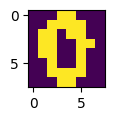

正确标签结果:[0]
预测结果:[1]

测试集的第28张手写数字图片:


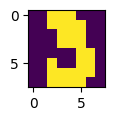

正确标签结果:[3]
预测结果:[8]

测试集的第29张手写数字图片:


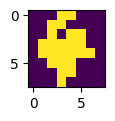

正确标签结果:[4]
预测结果:[1]



In [6]:
# 展示测试集的测试结果:
# print(y_te)
# print(y_te_predict)
acc_score = accuracy_score(y_test, y_te_predict)
print("acc_score:"+str(acc_score))
# 展示部分图片的预测结果
for i in range(20,30):
    print("测试集的第",i,"张手写数字图片:",sep="")
    # 原始图片需要顺时针旋转90度再水平翻转才是正确结果
    img_show=np.flip(np.rot90(X_te[i],k=-1),1)
    #展示图片，不要太大
    plt.figure(figsize=(1,1))
    plt.imshow(img_show)
    # plt.imshow(img_show,cmap='gray')
    plt.show()
    print("正确标签结果:",y_test[i],sep="")
    print("预测结果:",y_te_predict[i],sep="")
    print()

In [7]:
# 处理灰度版本
class image_to_signal_gray:
    # 初始化函数
    def __init__(self,
                X_signal : np.array = None,
                Y_result : np.array = None,
                N_res : int = 50,
                K_in : int = -1,
                pulse_time : float = 1,
                time_frame : float = 3,
                interval_time : float = 2, 
                sparsity : float = -1):
        '''
        X_signal: 输入的图片，经过了二级化处理，可以根据像素确定是否有信号
        Y_result: 图片的分类结果，已进行了预处理后的图片，用于训练的拟合
        N_res: 隐藏层神经元数量，对应忆阻器的数量
        K_in: 稀疏性，对应的是每个忆阻器读取的每行图片元素数量
        pulse_time: 脉冲时间长度，对应的是单个信号的激活时间
        time_frame: 时间帧长度，对应的是单个信号的激活和衰减时间
        interval_time: 时间步间隔长度，对应的是每个
        sparsity: 稀疏性，对应的是每个忆阻器读取的每行图片元素数量比例
        '''
        # 根据mat文件设置激活信号的值计算和衰减值的计算
        self.up = scio.loadmat('./up.mat')["p"][0]
        self.down = scio.loadmat('./down.mat')["p2"][0]
        
        # 记录忆阻器数量
        self.N_res = N_res
        
        # 记录脉冲时间长度，时间帧长度和时间步的间隔长度
        self.pulse_time = pulse_time
        self.time_frame = time_frame
        self.interval_time = interval_time
        
        # 记录脉冲对应的激活最大等级
        self.max_rank = float(16)
        
        # 记录稀疏性和稀疏性比例
        self.K_in = K_in
        self.sparsity = sparsity
        
        # 对储备池状态信息进行拟合，使用回归器
        self.regressor = IncrementalRegression(alpha=1e-4)
        # 使用LabelBinarizer对分类进行one-hot编码
        self._encoder = LabelBinarizer()
        
        # 调用init_use函数，可以多次初始化输入图片和分类结果
        self.init_use(X_signal,Y_result)
        
        
    #初始化使用函数，参数同上
    def init_use(self,
                X_signal : np.array = None,
                Y_result : np.array = None):
        
        # 记录输入图片和对应分类
        self.input = X_signal
        self.res = Y_result
        
        # 根据输入的图片大小计算时间步数量、时间帧数量和输入图片的特征数(即每行像素数量)
        self.num_step = self.input[0].shape[0]
        self.num_frame = self.input[0].shape[1]
        self.N_features = self.input[0].shape[1]
        if self.K_in > 0:
            if self.K_in <=  self.N_features:
                self.num_frame = self.K_in
        elif self.sparsity > 0:
            self.num_frame = math.ceil(self.sparsity*self.num_frame)
        
        # 根据稀疏性随机选择每行部分像素形成脉冲
        self.random_sequence = np.zeros(shape = (self.N_res,self.num_step,self.num_frame), dtype=int)
        for i in range(self.N_res):
            for j in range(self.num_step):
                self.random_sequence[i][j] = np.sort(np.random.permutation(self.N_features)[0:self.num_frame])
     
        # 记录忆阻器对应的储备池状态信息
        self.hidden_layer_state = np.ndarray(shape = (self.input.shape[0]),dtype = object)
        for i in range(self.hidden_layer_state.shape[0]):
            self.hidden_layer_state[i] = np.zeros(shape = (self.num_step,self.N_res),dtype = float)
        self.state_index = 0
        
        # 完成上述处理后，将输入图片和对应分类进行序列连接，得到相应的连续ndarray数组，用于进一步处理
        self.input,self.res,self.sequence_ranges = concatenate_sequences(self.input,
                                                                         self.res,
                                                                         sequence_to_value = False)
        
    # 定义脉冲激活函数
    def caculate_pulse_up(self,value,rank):
        # 根据脉冲对应的灰度等级计算激活时间
        x = self.pulse_time*(rank/self.max_rank)
        up_value = self.up[0]* x**5 + \
                self.up[1]* x**4 + \
                self.up[2]* x**3 + \
                self.up[3]* x**2 + \
                self.up[4]* x + self.up[5]
        return value + up_value
    
    # 定义衰减函数,在遇到激活信号时进行时间结算,或者计算隐藏层状态信号
    def caculate_signal_down(self,value,have_down_time):
        x = have_down_time
        down_ratio = self.down[0] * math.exp(-self.down[1]*x) + self.down[2] + \
                     self.down[3] * math.exp(-self.down[4]*x) + self.down[5] + \
                     self.down[6] * math.exp(-self.down[7]*x) + self.down[8]
        return value * down_ratio
    
    # 定义时间帧计算函数
    def caculate_time_frame(self,value,have_down_time,signal):
        if signal <= 4.0:
            return value, have_down_time + self.time_frame
        elif signal >= 12.0:
            value = self.caculate_signal_down(value,have_down_time)
            value = self.caculate_pulse_up(value,self.max_rank)
            return value, self.time_frame - self.pulse_time
        else:
            value = self.caculate_signal_down(value,have_down_time)
            value = self.caculate_pulse_up(value,signal)
            return value, self.time_frame - self.pulse_time*(signal/self.max_rank)
         
    # 定义时间步计算函数
    def caculate_time_step(self,value,have_down_time,image_row,random_sequence):
        for i in range(random_sequence.shape[0]):
            value,have_down_time = self.caculate_time_frame(value,
                                                       have_down_time,
                                                       image_row[random_sequence[i]])
        return value, have_down_time
    
    # 定义忆阻器读取状态计算函数，对应储备池的神经元状态信息
    # 每次读取一张图片进行记录
    def caculate_hidden_layer_state(self, X: np.ndarray = None, 
                                    hidden_layer_state: np.ndarray = None,
                                    state_index: int = 0):
        # # 清空储备池的信息
        # self.hidden_layer_state = np.zeros(shape = (self.num_step,self.N_res),dtype = float)
        
        # # i循环是图片
        # for i in range(int(self.input.shape[0]/self.num_step)):
        # j循环是忆阻器群
        for j in range(self.N_res):
            # value是输入新的时间步时忆阻器的当前信号值
            value = 0.0
            # have_down_time是从上次激活开始的总衰减时间
            have_down_time = 0.0

            # k循环是时间步
            for k in range(self.num_step):
                # 计算忆阻器读取图片特定行转换的信号后的信号值变化和已衰减时间变化
                # 如没有激活信号，则信号不变，改变已衰减时间，从而在需要时计算新的激活前信号值
                value,have_down_time = self.caculate_time_step(value,
                                                          have_down_time,
                                                          X[k],
                                                          # self.input[i*self.num_step+k],
                                                          self.random_sequence[j][k])
                # 根据变化后的情况计算隐藏层状态
                # self.hidden_layer_state[i][k][j] = self.caculate_signal_down(value,have_down_time)
                hidden_layer_state[state_index][k][j] = self.caculate_signal_down(value,have_down_time)
                # 根据时间步间隔时间修改已衰减时间
                have_down_time += self.interval_time
        return hidden_layer_state
        
    # 定义部分训练函数，用于计算序列的部分图片，保证逆矩阵的推迟计算
    def partial_fit(self, 
                    X: np.ndarray = None, 
                    y: np.ndarray = None, 
                    postpone_inverse: bool = False):
        # 计算输入图片对应的储备池信息
        self.caculate_hidden_layer_state(X,self.hidden_layer_state,self.state_index)
        # 对图片进行拟合
        self.regressor.partial_fit(self.hidden_layer_state[self.state_index],y,postpone_inverse)
        # 状态索引+1
        self.state_index += 1

        
    # 定义训练函数,可以输入新的数据，也可以使用已有数据
    # 注意使用新的数据会导致原有的数据被重置
    def fit(self,
            X_train : np.ndarray = None, 
            Y_train : np.ndarray = None):
        # 修改输入的input和res
        if X_train is not None and Y_train is not None:
            self.init_use(X_train,y_train)
        
        # 对结果进行二进制编码，使用标签编码器,完成编码
        self._encoder = LabelBinarizer().fit(self.res)
        self.res = self._encoder.transform(self.res)
        
        # 拟合最后一张图片之前的图片，并推迟计算逆矩阵
        [self.partial_fit(X = self.input[idx[0]:idx[1],...],
                          y = self.res[idx[0]:idx[1],...],
                          postpone_inverse=True)
        for idx in self.sequence_ranges[:-1]]
        
        # 拟合最后一张不推迟逆矩阵的计算
        self.partial_fit(X = self.input[self.sequence_ranges[-1][0]:, ...],
                         y = self.res[self.sequence_ranges[-1][0]:, ...],
                         postpone_inverse=False)
        
    # 定义预测函数
    def predict(self, X_test: np.ndarray = None):
        # 初始化临时的储备池，用于记录测试集的结果
        hidden_layer_state = np.ndarray(shape = (X_test.shape[0]),dtype = object)
        for i in range(hidden_layer_state.shape[0]):
            hidden_layer_state[i] = np.zeros(shape = (self.num_step,self.N_res),dtype = float)
        
        # 记录图片索引
        state_index = 0
        
        # 记录预测结果
        y = np.empty(shape=X_test.shape, dtype=object)
        
        # 进行储备池计算
        for i in range(len(X_test)):
            self.caculate_hidden_layer_state(X_test[i], hidden_layer_state,state_index)
            y[i] = self.regressor.predict(hidden_layer_state[i])
            # 二进制标签分类转为多分类标签
            y[i] = MatrixToValueProjection(
                    output_strategy= "winner_takes_all")\
                    .fit_transform(y[i])
            state_index += 1

        # 返回预测结果
        return y


In [8]:
example2 = image_to_signal_gray(X_signal = X_tr2, Y_result= y_tr2, N_res = 800, K_in = 2,
                                pulse_time = 1, time_frame = 4, interval_time = 6)
example2.fit()
y_te_predict2 = example2.predict(X_test = X_te2)

acc_score:0.95
测试集的第10张手写数字图片:


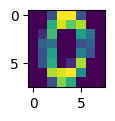

正确标签结果:[0]
预测结果:[0]

测试集的第11张手写数字图片:


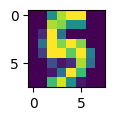

正确标签结果:[5]
预测结果:[5]

测试集的第12张手写数字图片:


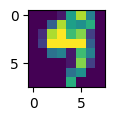

正确标签结果:[9]
预测结果:[9]

测试集的第13张手写数字图片:


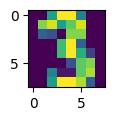

正确标签结果:[3]
预测结果:[3]

测试集的第14张手写数字图片:


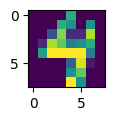

正确标签结果:[4]
预测结果:[4]

测试集的第15张手写数字图片:


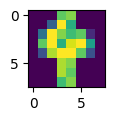

正确标签结果:[4]
预测结果:[4]

测试集的第16张手写数字图片:


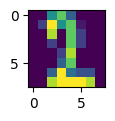

正确标签结果:[2]
预测结果:[2]

测试集的第17张手写数字图片:


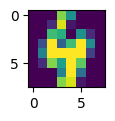

正确标签结果:[4]
预测结果:[4]

测试集的第18张手写数字图片:


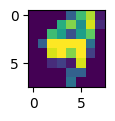

正确标签结果:[9]
预测结果:[9]

测试集的第19张手写数字图片:


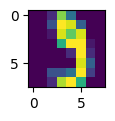

正确标签结果:[9]
预测结果:[9]



In [9]:
# 展示测试集的测试结果:
acc_score = accuracy_score(y_test2, y_te_predict2)
print("acc_score:"+str(acc_score))
# 展示部分图片的预测结果
for i in range(10,20):
    print("测试集的第",i,"张手写数字图片:",sep="")
    # 原始图片需要顺时针旋转90度再水平翻转才是正确结果
    img_show=np.flip(np.rot90(X_te2[i],k=-1),1)
    #展示图片，不要太大
    plt.figure(figsize=(1,1))
    plt.imshow(img_show)
    # plt.imshow(img_show,cmap='gray')
    plt.show()
    print("正确标签结果:",y_test2[i],sep="")
    print("预测结果:",y_te_predict2[i],sep="")
    print()